# 教師なし学習

## クラスタリング
### K-means

irisの特徴量`petal_length`と`petal_width`を用いて、クラスタリング手法の一つであるK-meansを使ってクラスタリングします

K-meansではクラスタの数を指定する必要があります。ここでは3つのクラスタを生成します。

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
data = datasets.load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names).reset_index(drop=True)
target = pd.DataFrame(data.target, columns = ['species']).reset_index(drop=True)
df = df.merge(target, left_index=True, right_index=True, )
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
X_iris=df[['petal length (cm)', 'petal width (cm)']]

model = KMeans(n_clusters=3) # k-meansモデル、n_clustersでクラスタの数を指定
model.fit(X_iris) # モデルをデータに適合
y_km=model.predict(X_iris) # クラスタを予測

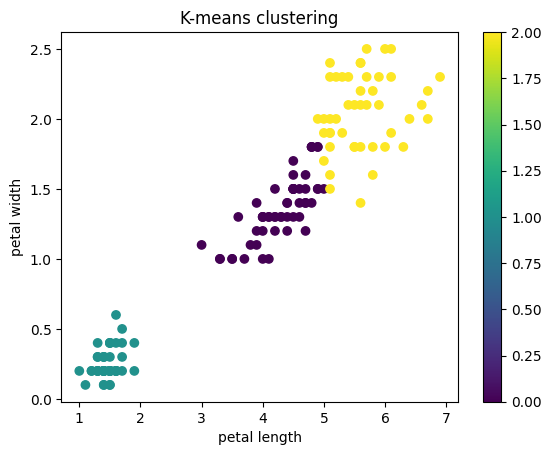

In [4]:
plt.figure()
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c = y_km)
plt.colorbar()
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('K-means clustering')
plt.show()

### PCA（主成分分析）次元削減

PCA（主成分分析）で次元削減を行う目的はいくつかあります。  
主に以下のような理由です。

**計算コストの削減**  
特徴量が多いと、機械学習モデルの学習に時間がかかります、過学習のリスクも高まります。  
PCAで特徴量を減らすことで、学習時間の短縮やモデルのシンプル化が可能になります。  
特徴量が減れば、学習・予測の速度が向上します。  

**情報の圧縮（次元削減）**  
データには多数の特徴量（変数）があることが多いですが、それらの中には似たような情報を持っているものもあります。  
PCAは相関の高い変数をまとめ、「できるだけ情報を失わないように」少数の新しい軸（主成分）に圧縮します  
→ 少ない次元で効率的にデータを表現できる。  
→ 重要な特徴を抽出できる。  
→ 予測に本当に役立つ要素だけを取り出すことができます。  

**データの可視化が容易になる**  
圧縮した2次元・3次元データなら、散布図などで傾向を直感的に把握できます。   
PCAを使えば、高次元のデータを2次元や3次元に射影できるので、クラスタリングの傾向や異常値の存在などが見やすくなります。  

**ノイズ除去**  
高次元データの中には、分析にほとんど寄与しない「ノイズ的な変数」も含まれています。  
PCAでは分散が小さい成分（＝ほとんど情報を持たない軸）を落とすことで、ノイズを減らし、より本質的な構造を捉えることができます。  

ここでは、irisデータの4つの特徴量を2次元にPCAを用いて削減します。

In [5]:
X = df.iloc[:, :4]
y = df['species']

PCAを実行する前に標準化します。

In [6]:
# 特徴量の標準化
X = StandardScaler().fit_transform(X)

In [7]:
# PCAの実行（2次元に圧縮）
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [9]:
print(X.shape) # もともとの特徴量

(150, 4)


In [10]:
print(X_pca.shape) # 特徴量が圧縮されている。次元が削減されている

(150, 2)


どのくらいデータを説明できているか、寄与率(explained_variance_ratio)を用いて確認します。

PCAの説明分散（または固有値）は、各主成分に帰属させることができる分散を示します。  
各値は各主成分の分散に等しく、配列の長さは n_components で定義された成分の数に等しくなります。

In [13]:
print("寄与率:", pca.explained_variance_ratio_)  # 寄与率
print("累積寄与率:", sum(pca.explained_variance_ratio_)) # 累積寄与率

寄与率: [0.72962445 0.22850762]
累積寄与率: 0.9581320720000163


PCA後のデータを可視化

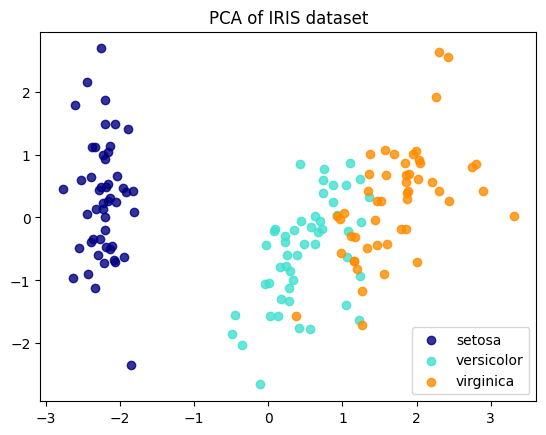

In [14]:
colors = ['navy', 'turquoise', 'darkorange']
target_names =  ['setosa','versicolor','virginica']
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=.8, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')
plt.show()